

# Project: Investigate a Dataset [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
# Introduction
in this data there is a significant proportion of patients who didn't show up, so we will investigate through this data to know what is the factors which may affect the presence of the patient and try to make predictions upon some findings.

### Dataset Description 
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

scholarship variable means medical assurance 
### Data Dictionary
#### 01-PatientId       
Identification of a patient

#### 02- AppointmentID
Identification of each appointment

#### 03 - Gender
Male(M) or Female(F)

#### 04 - ScheduledDay
The day someone called or registered the appointment, this is before appointment.

#### 05 -AppointmentDay
The day of the actuall appointment, when they have to visit the doctor.

#### 06 - Age
How old is the patient.

#### 07 - Neighbourhood
Where the appointment takes place.

#### 08 - Scholarship
True(1) or False(0)

#### 09 - Hipertension
True(1) or False(0)

#### 10 - Diabetes
True(1) or False(0)

#### 11-Alcoholism
True(1) or False(0)

#### 12-Handcap
refer to the number of disablities 0 means have no disablity 1 means have one disablity 2 have means have two and so on.

#### 13-SMS_received
True(1) or False(0)

#### 14-No-show
Yes or No ("No means that patients did show up ,"Yes"means that patient didn't show up) 

### Question(s) for Analysis

#### Q1 how many patients did show up and patients who didn't?

#### Q2 what is the most committed gender regard to the appointments ?

#### Q3 what is the age categories which didn't show up in the appointment the most?

#### Q4  what is the most categories of patient based their disease\disability who show commitment to their appointment the most?

#### Q5 did the patients who have a medical assurance(Scholarship) show up more than patients who haven't a medical assurance?

#### Q6 did the patients get notified by SMS commit more with their appointment than patients who didn't receive SMS?



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Gathering

In [2]:
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")#import the data frame
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()#cheking for data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
len(df[df.duplicated()])#cheking for duplicates

0

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Assening 
-PatientId is a float

-AppointmentID is a int 

-ScheduledDay is a string

-AppointmentDay is a string

-Age column contain invalid value -1!

-the(-)in No-show   


### Data Cleaning 

# Define
convert PatientId to string 

we will not need appointmentid so we will drop It

In [6]:
# We will convert the patientid to string 
df["PatientId"]=df["PatientId"].astype(str)
#droping appointmentId column 
df.drop("AppointmentID",axis=1,inplace=True)

# test

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(7), object(6)
memory usage: 11.0+ MB


# Define
convert ScheduledDay and AppointmentDay to date time 

In [8]:
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

# test

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hipertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handcap         110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  No-show         110527 non-null  object             
dtypes: datetime64[

# Define
-drop the  invalid values in age columns  


In [10]:
df[df["Age"]<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
df.drop(index=99832,inplace=True)

# test

In [12]:
df[df["Age"]<0].any()

PatientId         False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

# Define
replace - with _


In [13]:
df.rename(columns=lambda x:x.replace("-","_"),inplace=True)

# test

In [14]:
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')


## Exploratory Data Analysis



In [15]:
def bar_chart(labels, data, title, xlabel, ylabel):
    """
    I used this function to avoid repeating the code for each time I need to use bar chart
    """
    plt.bar(labels,data);
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    return labels, data, title, xlabel, ylabel

# Q1 how many patients did show up and patients who didn't?

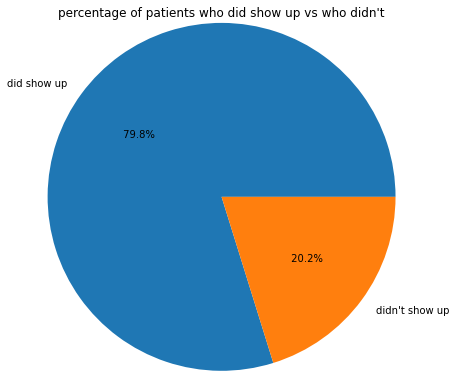

In [16]:
label=["did show up","didn't show up"]#making label for pie chat
#ploting pie chart #autopct to show one decimal 
plt.pie(df["No_show"].value_counts(),labels=label,radius=2,autopct="% .1f%%");
#creating plot title 
plt.title("percentage of patients who did show up vs who didn't",y=1.3);
#y=1.3 to avoid overwriting on pie chart

there is 20 percent of patients didn't show up 

# Q2 what is the most committed gender regard to the appointments ?

In [17]:
#we will make a new data frame using group by to get the number of No_show for each gender in Age column 
age_commitment=df.groupby(["Gender","No_show"],as_index=False).PatientId.count()#using PatientId column as a counter
age_commitment2=age_commitment.query('No_show=="No"')#making another data frame based only on patients who show up
female_commitment=age_commitment2.PatientId[0]/len(df[df["Gender"]=="F"])*100#get the percentage
male_commitment=age_commitment2.PatientId[2]/len(df[df["Gender"]=="M"])*100#get the percentage


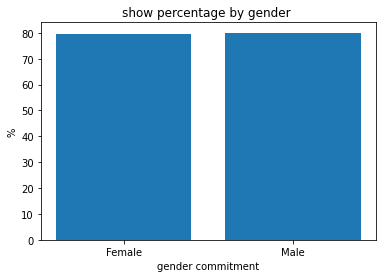

In [18]:
bar_chart(["Female","Male"],[female_commitment,male_commitment] ,
          "show percentage by gender " ,"gender commitment" ,"%" );



so the show up percentage of both gender is very close to each other, so we can't predict whether the patient will show up more or will be more absent based on gender

# Q3 what is the age categories which didn't show up in the appointment the most?

to answer that question I used that [scale](https://www.statcan.gc.ca/eng/concepts/definitions/age2)

Children (00-14 years)

Youth (15-24 years)

Adults (25-64 years)

Seniors (65 years and over)

In [19]:
#to answer this question we will create a new column called age categories by using pd.cut

#creating bins to cut Age columns into groups 
bins=[0,15,25,65,115]
bins_labels=["Children","Youth","Adults","Seniors"]
df["Age_categories"]=pd.cut(df['Age'],bins,labels=bins_labels)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_categories
0,29872499824296.0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adults
1,558997776694438.0,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adults
2,4262962299951.0,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adults
3,867951213174.0,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,8841186448183.0,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adults


In [20]:
#we will make a new data frame using group by to get the number of No_show for each category in Age_categories
age=df.groupby(["Age_categories",'No_show'],as_index=False).PatientId.count()#using PatientId column as a counter
age2=age.query('No_show=="No"')#making another data frame based only on patients who show up
age2

,Age_categories,No_show,PatientId
0,Children,No,16320
2,Youth,No,10561
4,Adults,No,47191
6,Seniors,No,11235


In [21]:
#we will use PatientId column index to get value for each category then dividing it by number of 
#each category in original data set 
Children_percentage=age2.PatientId[0]/len(df[df["Age_categories"]=="Children"])*100#get the percentage
Youth_percentage=age2.PatientId[2]/len(df[df["Age_categories"]=="Youth"])*100#get the percentage
Adults_percentage=age2.PatientId[4]/len(df[df["Age_categories"]=="Adults"])*100#get the percentage
Seniors_percentage=age2.PatientId[6]/len(df[df["Age_categories"]=="Seniors"])*100#get the percentage


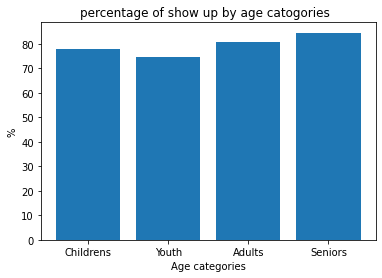

In [22]:
bar_chart(['Childrens','Youth','Adults','Seniors'], 
    [Children_percentage,Youth_percentage,Adults_percentage,Seniors_percentage],
"percentage of show up by age catogories  ", "Age categories", "%"); 

the seniors showed the maximum commitment with appointment more than the other categories while youth show the least commitment regarding to appointment

# Q4 what is the most categories of patient based their disease\disability who show commitment to their appointment the most?

In [23]:
#here we will use another way rather than group by to abbreviate the code
#we will filter the data to the desired patients, 
#then using query to get only the patients who showed up from the desired patients then using len
#to get the whole number then dividing by whole number of desired patients to get the percentage
Hipertension=len(df[df['Hipertension']==1].query('No_show=="No"'))/len(df[df['Hipertension']==1])*100
Diabetes=len(df[df['Diabetes']==1].query('No_show=="No"'))/len(df[df['Diabetes']==1])*100
Alcoholism=len(df[df['Alcoholism']==1].query('No_show=="No"'))/len(df[df['Alcoholism']==1])*100
Handcap=len(df[df['Handcap']>=1].query('No_show=="No"'))/len(df[df['Handcap']>=1])*100

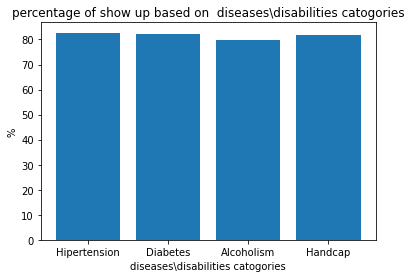

In [24]:
bar_chart(['Hipertension','Diabetes','Alcoholism','Handcap'],
          [Hipertension,Diabetes,Alcoholism,Handcap], 
          "percentage of show up based on  diseases\disabilities catogories",
          "diseases\disabilities catogories", "%");

It's clear that that all patients catogories based on disease\disability are very close to each other except patients infected by alcohlism who show the lowest show up percentage, so we predict that most who don't show up are most likely alcholic

# Q5 did the patients who have a medical assurance(Scholarship) show up more than patients who haven't a medical assurance?

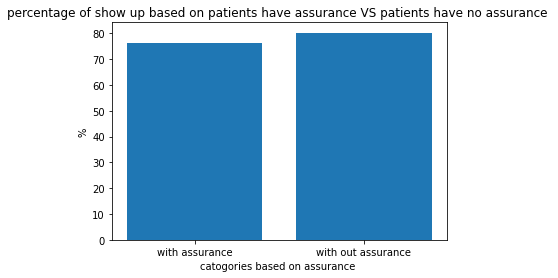

In [25]:
#to answer that question we need to create two data frame one for patient who have a medical assurance
#and one for patients who haven't
df_0=df[df["Scholarship"]==1]#creating data frame for patient who have a medical assurance
df_1=df[df["Scholarship"]==0]#creating data frame for patient who haven't a medical assurance
assurance=len(df_0[df_0['No_show']=="No"])/len(df[df["Scholarship"]==1])*100 #get the percentage
no_assurance=len(df_1[df_1['No_show']=="No"])/len(df[df["Scholarship"]==0])*100#get the percentage
bar_chart(["with assurance","with out assurance"], [assurance,no_assurance],
          "percentage of show up based on patients have assurance VS patients have no assurance ", 
          "catogories based on assurance ", "%");

patients who have medical assurance are less committed with appointment than patient who haven't

# Q6 did the patients get notified by SMS commit more with their appointment than patients who didn't receive SMS?

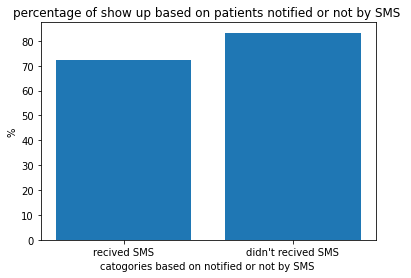

In [26]:
#same method in Q4
SMS=len(df[df['SMS_received']==1].query('No_show=="No"'))/len(df[df['SMS_received']==1])*100#get the percentage
No_SMS=len(df[df['SMS_received']==0].query('No_show=="No"'))/len(df[df['SMS_received']==0])*100#get the percentage
bar_chart(["recived SMS","didn't recived SMS"],[SMS,No_SMS], 
          "percentage of show up based on patients notified or not by SMS ", 
          "catogories based on notified or not by SMS ", "%");

surprisingly! patients notified by SMS showed up less than patients who not received SMS message by nearly 10%













<a id='conclusions'></a>
## Conclusions
-Nearly 80% of patients did show up

-20% of patients didn't show up 

-Gender didn't impact the percentage of show up

-Generally, older patients categories were more committed with appointments than children and youth

-Alcoholic patients showed the lowest commitment with the appointment 

-patients have medical assurance show lower commitment with appointment than patients who haven't

-patients notified by SMS showed up less than those who didn't notify



### Limitations
-the data doesn't clarify the time of receiving the SMS messages, so we can't investigate more to know whether these messages have a counter effect on show up a percentage of show up  these messages such as inefficient because they were sent in inappropriate time (very close or very early from appointment time)


